In [1]:

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import time


In [2]:
# import decoupler as dc
import pandas as pd
import sys
import pickle
import tqdm
import scipy
import anndata

import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
inference = DefaultInference(n_cpus=8)

In [3]:
#https://stackoverflow.com/a/49199019
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name


# New version

In [4]:
ad_f=sc.read_h5ad('/home/ec2-user/curation/heart_datasets/split/ad_f.h5ad.gz')

In [5]:
dds_f = DeseqDataSet(
    adata=ad_f.copy(),
    # design_factors=['xist','donor_id'],
    design='~xist+donor_id',
    refit_cooks=True,
    inference=inference,
    quiet=False)


In [6]:
dds_f.obsm['design_matrix']

,Intercept,xist[T.present],donor_id[T.15_144548-RV_brener],donor_id[T.1221_tucker],donor_id[T.1600_tucker],donor_id[T.1708_tucker],donor_id[T.1723_tucker],donor_id[T.A61_kanemaru],donor_id[T.AH1_kanemaru],donor_id[T.AV3_kanemaru],...,donor_id[T.PH-L22_linna_kuosmanen],donor_id[T.PH-M14_linna_kuosmanen],donor_id[T.PH-M22_linna_kuosmanen],donor_id[T.SAMN15889152_sim],donor_id[T.SAMN15889159_sim],donor_id[T.TWCM-296-R-post_amrute],donor_id[T.TWCM-296-R-pre_amrute],donor_id[T.TWCM-397-NR-post_amrute],donor_id[T.TWCM-397-NR-pre_amrute],donor_id[T.UK2_hill]
TWCM-296-R-post_absent,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
TWCM-296-R-pre_absent,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TWCM-397-NR-post_absent,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TWCM-397-NR-pre_absent,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
TWCM-296-R-post_present,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723_absent,1.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221_present,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1600_present,1.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1708_present,1.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dds_f.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 2.20 seconds.

Fitting dispersion trend curve...
/home/ec2-user/miniconda/envs/xist_old/lib/python3.13/site-packages/pydeseq2/dds.py:805: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.15 seconds.

Fitting MAP dispersions...
... done in 3.68 seconds.

Fitting LFCs...
... done in 4.81 seconds.

Calculating cook's distance...
... done in 0.06 seconds.

Replacing 0 outlier genes.



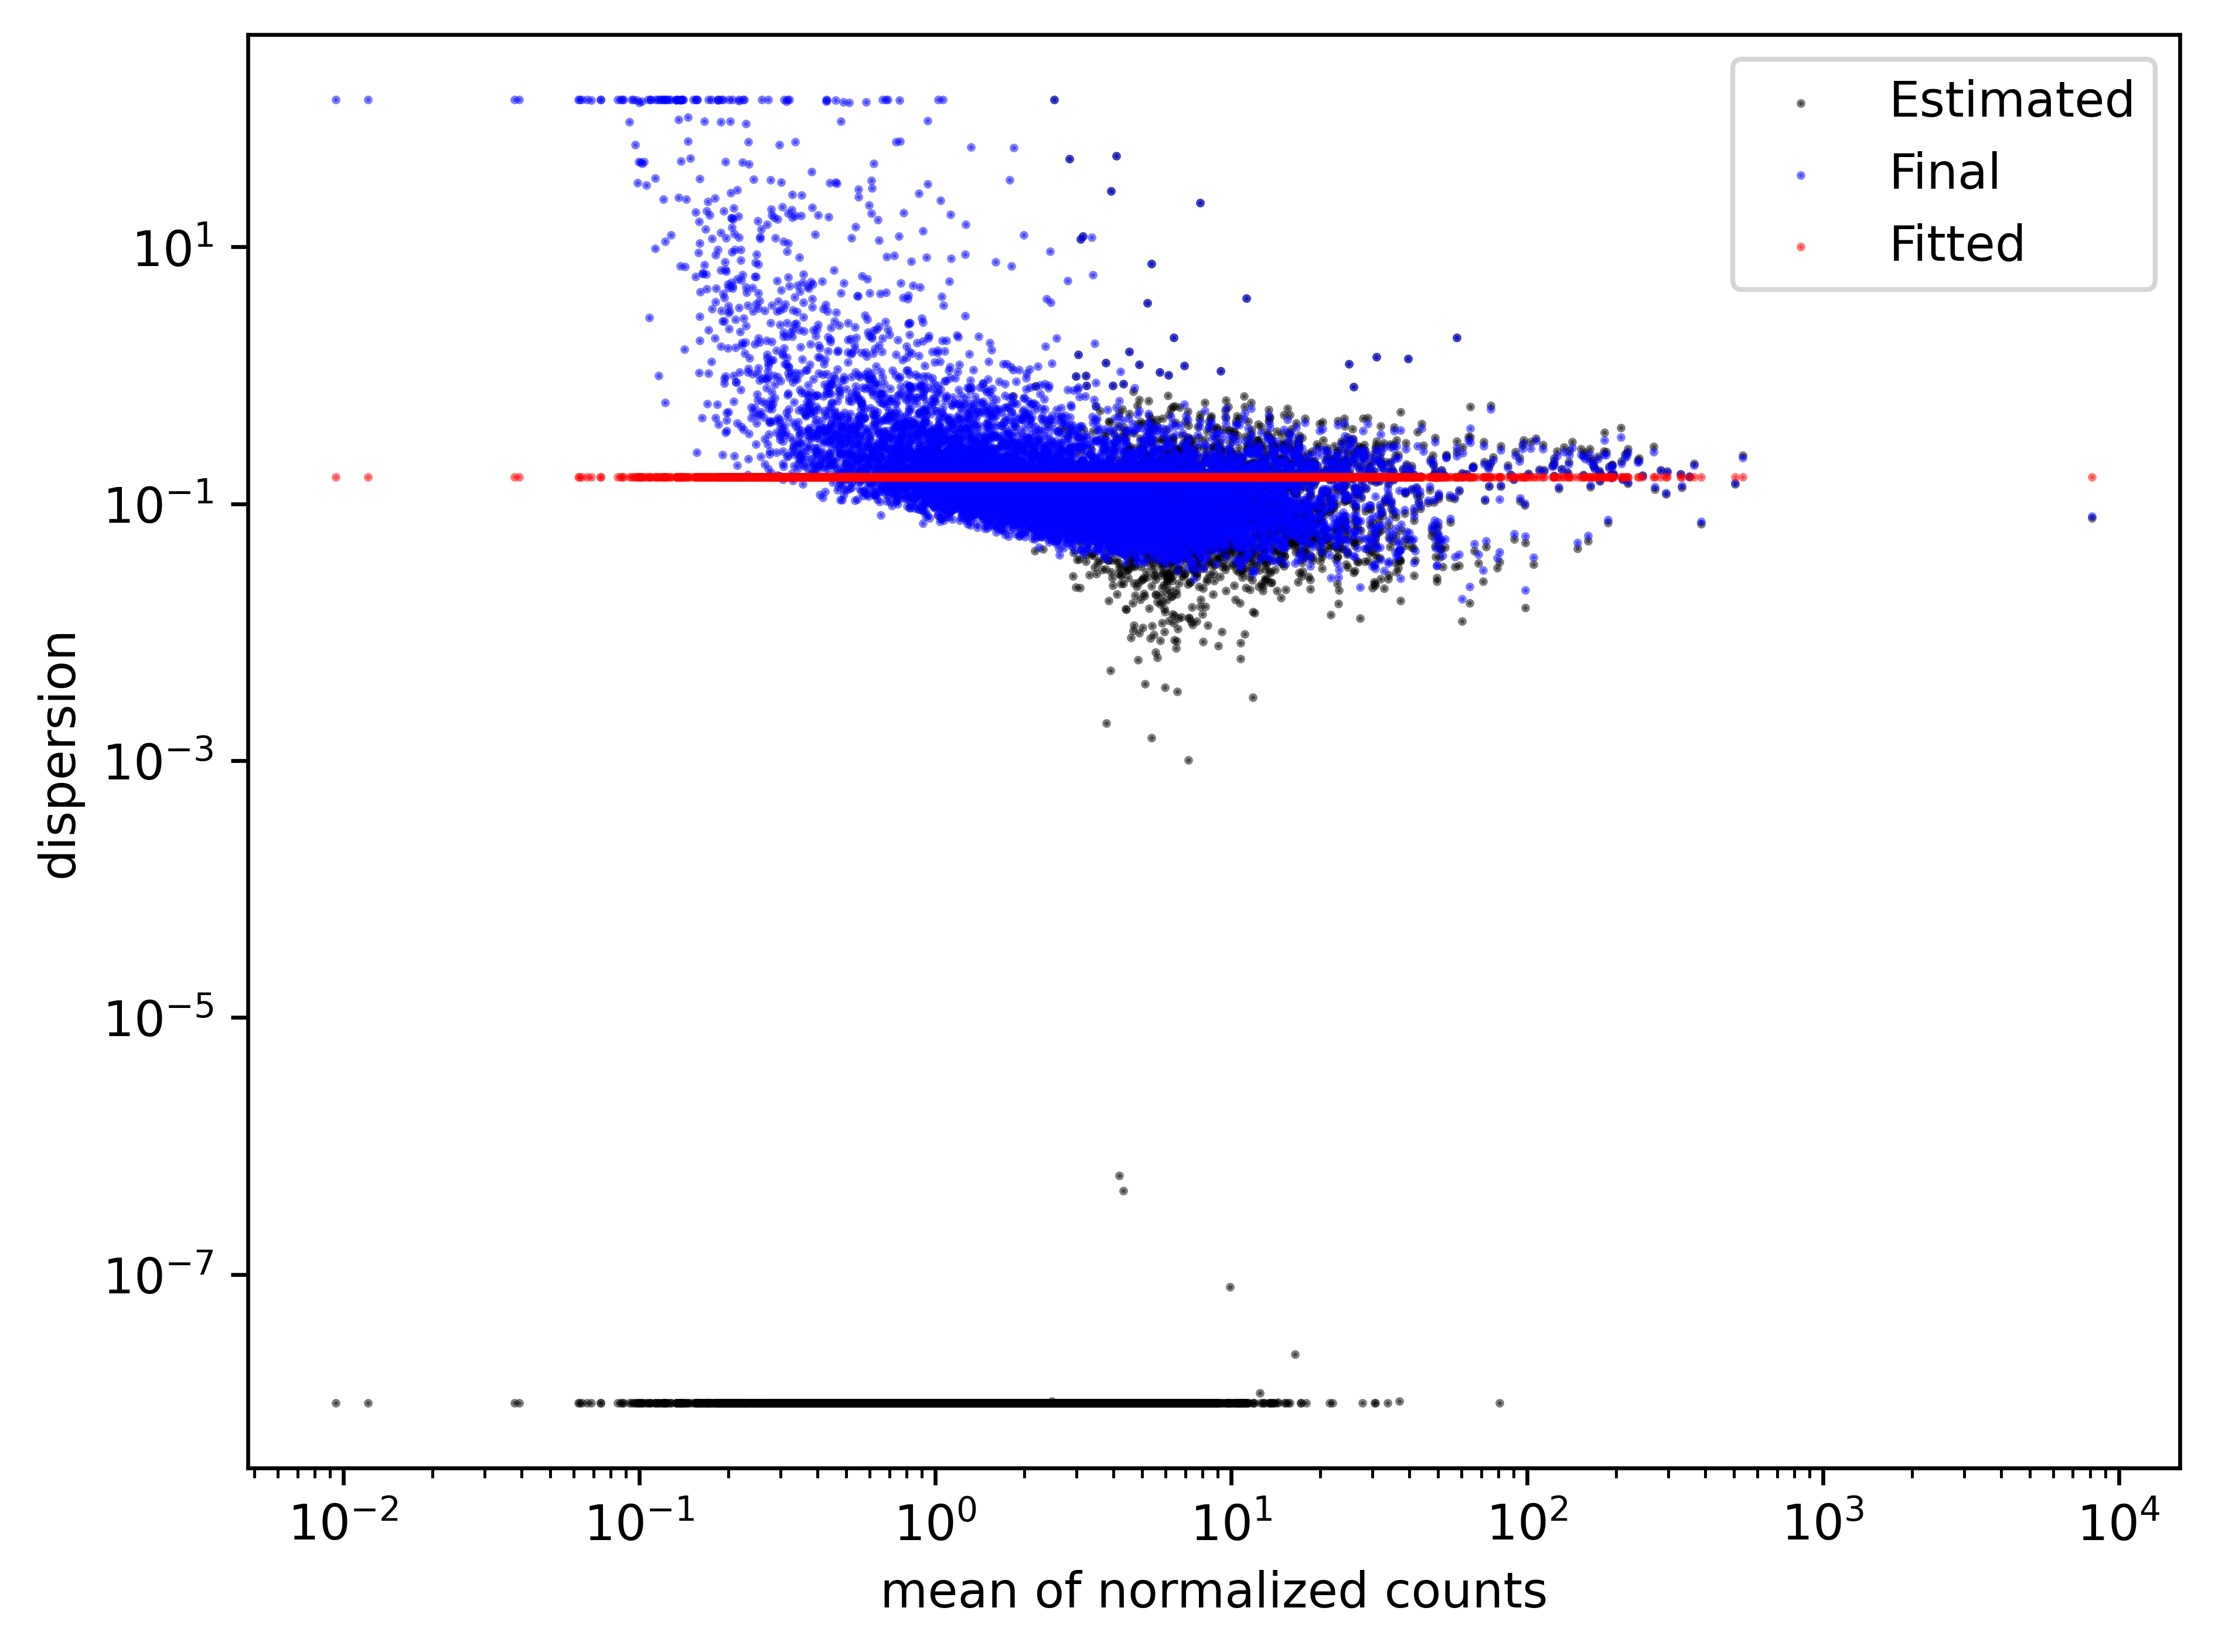

In [8]:
dds_f.plot_dispersions()

In [18]:
#https://stackoverflow.com/a/49199019
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))


anndata==0.11.4
matplotlib==3.10.3
numpy==2.2.6
pandas==2.2.3
pydeseq2==0.5.1
scanpy==1.11.1
scipy==1.15.3
tqdm==4.67.1


# Old version

In [4]:
ad_f=sc.read_h5ad('/home/ec2-user/curation/heart_datasets/split/ad_f.h5ad.gz')

In [5]:
dds_f = DeseqDataSet(
    adata=ad_f.copy(),
    design_factors=['xist','donor_id'],
    refit_cooks=True,
    inference=inference,
    quiet=False)


/tmp/ipykernel_30647/4060663907.py:1: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds_f = DeseqDataSet(
/home/ec2-user/miniconda/lib/python3.9/site-packages/pydeseq2/dds.py:262: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [6]:
dds_f.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 113.09 seconds.

Fitting dispersion trend curve...
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 101.90 seconds.

Fitting LFCs...
... done in 4.11 seconds.

Replacing 0 outlier genes.



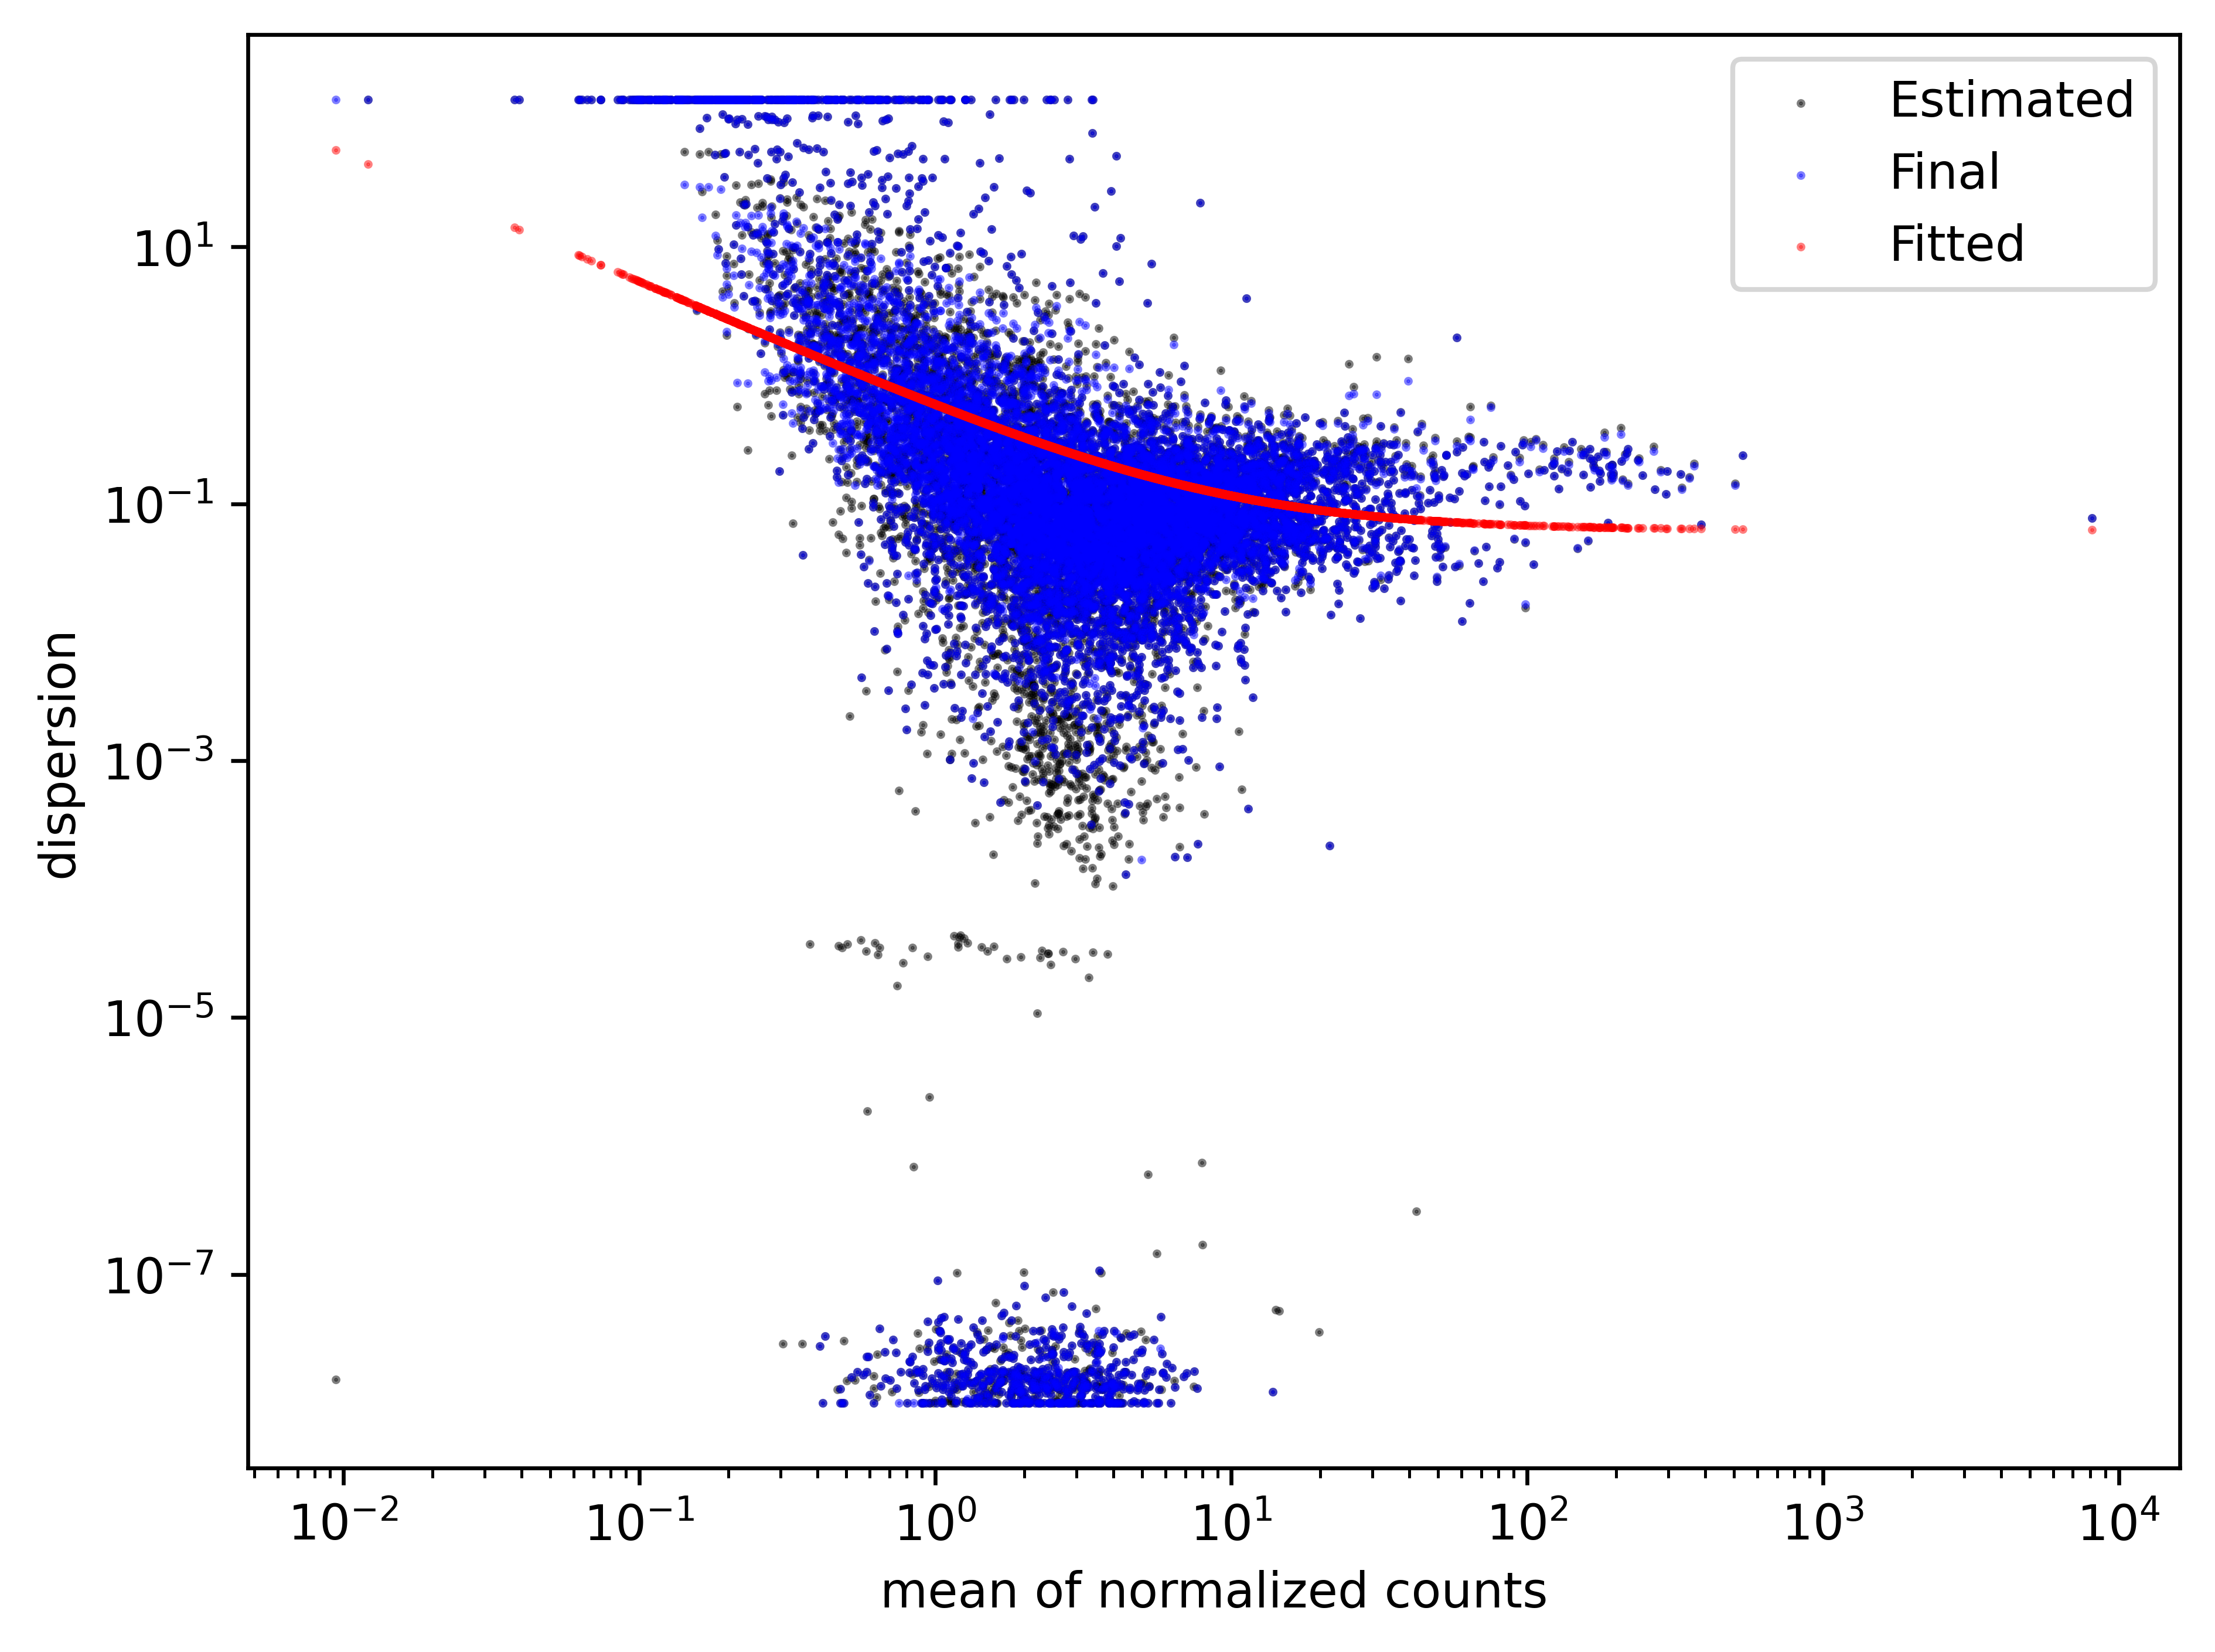

In [7]:
dds_f.plot_dispersions()

In [9]:
#https://stackoverflow.com/a/49199019
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))


tqdm==4.67.1
scipy==1.11.4
scanpy==1.9.6
pydeseq2==0.4.8
pandas==2.2.3
numpy==1.26.2
matplotlib==3.8.2
anndata==0.10.3
